# Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final.csv')

In [4]:
df.drop(['Customer_ID','Type_of_Loan'],axis=1,inplace=True)

In [5]:
df= df.sample(10000)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,33.561800,10.828698,14.000000,25.000000,33.000000,42.000000,56.000000
Annual_Income,10000.0,50746.732884,38306.789433,7005.930000,19606.680000,37688.550000,71565.540000,277803.000000
Num_Bank_Accounts,10000.0,5.387971,2.799580,0.000000,3.000000,5.000000,7.000000,83.000000
Num_Credit_Card,10000.0,5.546810,2.061002,0.000000,4.000000,5.000000,7.000000,11.000000
Num_of_Delayed_Payment,10000.0,13.393782,6.252243,0.000000,9.000000,14.000000,18.000000,49.000000
Credit_Utilization_Ratio,10000.0,32.314434,5.087363,20.880082,28.127770,32.368168,36.497363,48.489852
Total_EMI_per_month,10000.0,111.768318,161.840917,0.000000,29.837427,68.137232,150.273910,4330.000000
Delay_from_due_date,10000.0,21.040300,14.839788,-5.000000,10.000000,18.000000,28.000000,67.000000
Credit_History_Age_Formated,10000.0,220.009142,99.774694,1.000000,142.000000,219.000000,300.000000,403.000000
Auto_Loan,10000.0,0.309800,0.462434,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df['Missed_Payment_Day'] = 0
for row in df.index:
    if df.loc[row, 'Delay_from_due_date'] > 0:
        df.loc[row, 'Missed_Payment_Day'] = 1

In [8]:
df.drop(['Delay_from_due_date'],axis=1,inplace=True)

In [9]:
df['Payment_of_Min_Amount_Yes'] =df['Payment_of_Min_Amount']
df.drop(['Payment_of_Min_Amount'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 59849 to 47282
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  float64
 1   Annual_Income                10000 non-null  float64
 2   Num_Bank_Accounts            10000 non-null  float64
 3   Num_Credit_Card              10000 non-null  float64
 4   Num_of_Delayed_Payment       10000 non-null  float64
 5   Credit_Utilization_Ratio     10000 non-null  float64
 6   Total_EMI_per_month          10000 non-null  float64
 7   Credit_Score                 10000 non-null  object 
 8   Credit_History_Age_Formated  10000 non-null  float64
 9   Auto_Loan                    10000 non-null  int64  
 10  Credit-Builder_Loan          10000 non-null  int64  
 11  Personal_Loan                10000 non-null  int64  
 12  Home_Equity_Loan             10000 non-null  int64  
 13  Not_Specified    

In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [12]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define the numerical and categorical features
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [17]:
"""pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier())])
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training set
train_predictions = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict on the test set
test_predictions = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')
print(f'Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}')
print('-' * 40)"""

"pipeline = Pipeline(steps=[('preprocessor', preprocessor),\n                                ('classifier', RandomForestClassifier())])\ncv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)\n\n# Fit the pipeline on the training data\npipeline.fit(X_train, y_train)\n\n# Predict on the training set\ntrain_predictions = pipeline.predict(X_train)\ntrain_accuracy = accuracy_score(y_train, train_predictions)\n\n# Predict on the test set\ntest_predictions = pipeline.predict(X_test)\ntest_accuracy = accuracy_score(y_test, test_predictions)\n\nprint(f'CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')\nprint(f'Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}')\nprint('-' * 40)"

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

"""# Assuming X_train and y_train are your training data
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier())])

# Define a range of n_estimators to try
n_estimators_values = [10, 50, 100, 150, 200]

# Lists to store results
test_accuracies = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Set the current n_estimators value in the classifier step of the pipeline
    pipeline.set_params(classifier__n_estimators=n_estimators)

    # Perform cross-validation on the training data
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    test_predictions = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)

    # Print the results for each n_estimators
    print(f'n_estimators: {n_estimators} | CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f} | Test Accuracy: {test_accuracy:.4f}')"""

"# Assuming X_train and y_train are your training data\n# Define the pipeline\npipeline = Pipeline(steps=[('preprocessor', preprocessor),\n                             ('classifier', RandomForestClassifier())])\n\n# Define a range of n_estimators to try\nn_estimators_values = [10, 50, 100, 150, 200]\n\n# Lists to store results\ntest_accuracies = []\n\n# Iterate over different n_estimators values\nfor n_estimators in n_estimators_values:\n    # Set the current n_estimators value in the classifier step of the pipeline\n    pipeline.set_params(classifier__n_estimators=n_estimators)\n\n    # Perform cross-validation on the training data\n    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)\n\n    # Fit the pipeline on the training data\n    pipeline.fit(X_train, y_train)\n\n    # Predict on the test set\n    test_predictions = pipeline.predict(X_test)\n    test_accuracy = accuracy_score(y_test, test_predictions)\n    \n    # Append test accuracy 

In [19]:

"""# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, test_accuracies, marker='o', linestyle='-')
plt.title('Test Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()"""

"# Plot the results\nplt.figure(figsize=(10, 6))\nplt.plot(n_estimators_values, test_accuracies, marker='o', linestyle='-')\nplt.title('Test Accuracy vs. Number of Estimators')\nplt.xlabel('Number of Estimators')\nplt.ylabel('Test Accuracy')\nplt.grid(True)\nplt.show()"

## Final Pipeline

In [20]:
fpipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(bootstrap=True))
])

# Perform cross-validation on the training data
cv_scores = cross_val_score(fpipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

In [21]:
# Fit the pipeline on the training data
fpipeline.fit(X_train, y_train)

# Predict on the test set
test_predictions = fpipeline.predict(X_test)

# Calculate other metrics
train_predictions = fpipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results for each n_estimators
print(f'CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')
print(f'Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}')

CV Accuracy: 0.6495 +/- 0.0062
Train Accuracy: 1.0000 | Test Accuracy: 0.6540


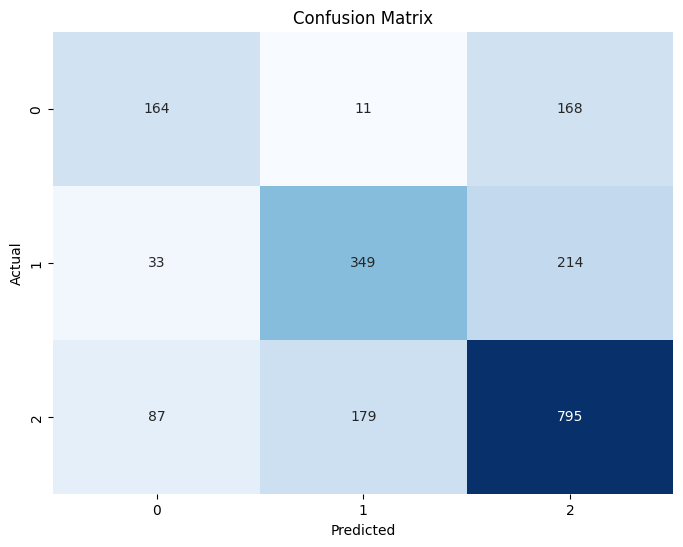

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Classification Report
report = classification_report(y_test, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Good       0.58      0.48      0.52       343
        Poor       0.65      0.59      0.61       596
    Standard       0.68      0.75      0.71      1061

    accuracy                           0.65      2000
   macro avg       0.63      0.60      0.62      2000
weighted avg       0.65      0.65      0.65      2000



In [24]:
import pickle
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(fpipeline, f)

In [25]:
model = joblib.load('C:/Users/bains/Downloads/GitHub24/projects/Credit_Classification_End_to_End/model.pkl')

NameError: name 'joblib' is not defined

In [ ]:
import joblib

In [ ]:
model.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer', SimpleImputer()),
                                                   ('scaler', StandardScaler())]),
                                   Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
         'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
         'Total_EMI_per_month', 'Credit_History_Age_Formated'],
        dtype='object')),
                                  ('cat',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('onehot',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   Index(['Payment_of_Min_Amount_Yes'], dtype='object'))])),
 ('classifier', RandomForestClassifier())]

In [ ]:
df[(df['Credit_Score'] == 'Standard') & (df['Age'] <= 20)].sample(5)

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Auto_Loan,Credit-Builder_Loan,Personal_Loan,Home_Equity_Loan,Not_Specified,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Missed_Payment_Day,Payment_of_Min_Amount_Yes
79524,14.0,60546.72,5.0,3.0,16.000000,23.454317,240.764163,Standard,89.0,0,0,0,0,1,1,1,0,1,1,Yes
5504,20.0,15054.47,10.0,9.0,24.000000,32.940774,68.263660,Standard,187.0,1,0,1,1,0,0,1,0,0,1,Yes
21157,20.0,80436.12,3.0,4.0,19.000000,34.965621,304.631707,Standard,90.0,0,0,0,0,1,1,0,1,0,1,Yes
93240,20.0,19889.44,8.0,7.0,12.571429,36.587956,60.928378,Standard,116.0,0,1,0,0,1,1,1,0,1,1,Yes
60239,16.0,32061.52,3.0,4.0,17.000000,29.790071,152.061236,Standard,80.0,1,0,1,0,0,0,1,1,1,1,Yes


In [ ]:
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Auto_Loan,Credit-Builder_Loan,Personal_Loan,Home_Equity_Loan,Not_Specified,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Missed_Payment_Day,Payment_of_Min_Amount_Yes
0,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,Good,265.0,1,1,1,1,0,0,0,0,0,1,No
1,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,Good,266.0,1,1,1,1,0,0,0,0,0,0,No
2,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,Good,267.0,1,1,1,1,0,0,0,0,0,1,No
3,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,Good,268.0,1,1,1,1,0,0,0,0,0,1,No
4,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,Good,269.0,1,1,1,1,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,Poor,378.0,1,0,0,0,0,0,1,0,0,1,No
99996,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,Poor,379.0,1,0,0,0,0,0,1,0,0,1,No
99997,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,Poor,380.0,1,0,0,0,0,0,1,0,0,1,No
99998,25.0,39628.99,4.0,6.0,6.4,33.638208,35.104023,Standard,381.0,1,0,0,0,0,0,1,0,0,1,No
